## Ensemble method :Type:I Voting classifier

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

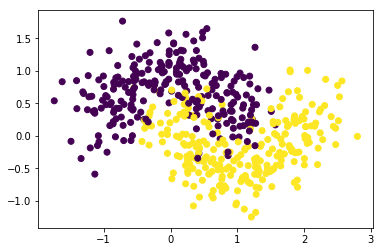

In [4]:
# Generate a dataset and plot it
X, y = sklearn.datasets.make_moons(500, noise=0.3,random_state=42) # check what happens,after changing noise = 0,.1,.2,.3
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
X

array([[ 8.31039149e-01, -2.58748754e-01],
       [ 1.18506381e+00,  9.20387143e-01],
       [ 1.16402213e+00, -4.55525583e-01],
       [-2.36556013e-02,  1.08628844e+00],
       [ 4.80502733e-01,  1.50942444e+00],
       [ 1.31164912e+00, -5.51176060e-01],
       [ 1.16542367e+00, -1.58629894e-01],
       [ 1.56736404e-01,  1.31817168e+00],
       [ 4.53301022e-01,  4.96074925e-01],
       [ 1.65139719e+00, -4.59804351e-01],
       [ 1.02664982e+00, -1.56999382e-02],
       [-3.99677570e-01,  2.52192940e-01],
       [ 1.85352710e+00, -7.16418704e-01],
       [ 1.17564737e-01,  6.24869329e-01],
       [ 1.54123944e+00, -5.11050694e-01],
       [ 1.32833559e+00, -5.40696860e-01],
       [ 1.97170320e+00,  2.97790052e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [ 8.30619129e-01, -8.02099114e-01],
       [ 1.89343763e+00, -2.53611270e-01],
       [ 1.88323111e+00,  2.22375278e-01],
       [ 2.30801311e+00,  4.67930154e-01],
       [-3.89437608e-01,  2.39389050e-01],
       [ 1.

In [6]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

#### Spliting the data set into train and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Importing all the library for ensemble method and   using voting classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
log_clf=LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma="scale", random_state=42)

In [10]:
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Lets look at each classifier's Accuracy on the test set:

In [14]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.904
